<a href="https://colab.research.google.com/github/cinthia005/Artificial-Intelligence/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Artificial Intelligence**
**ACTIVIDAD 7 - Convolutional Neural Network (CNN)**
* **Name:** Cinthia Janeth Pecina Hernández
* **ID Number:** 2062979
* **Class Time:** N2


# 1.  **Load Libraries**



In [19]:
#include keras library for dataset
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
from random import randint

# 2.   **Load data**
We load the handwritten digit pictures using the the MNIST dataset, and print some of the pictures to make sure they loaded correctly



Initial Training Images Shape: (60000, 28, 28)
Initial Training Labels Shape: (60000,)


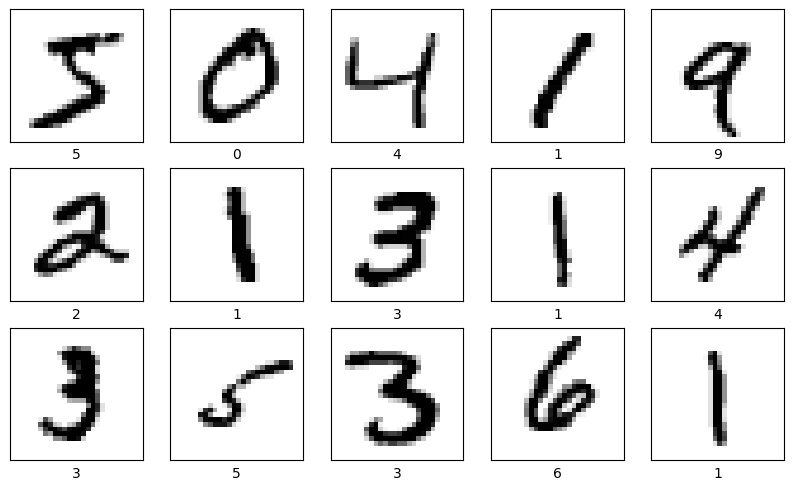

In [20]:
# Load data
# The original labels are integers, 1D arrays
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Initial Training Images Shape: {train_images.shape}")
print(f"Initial Training Labels Shape: {train_labels.shape}")

# Show Dataset Samples

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Use the reshaped images, and the original labels for display
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

#3. **Data preprocessing**
We prepare the pictures for the CNN by making their color values go from 0 to 1




In [21]:
# 1. Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Reshape the images to include the channel dimension (28x28x1)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
print(f"Reshaped Training Images Shape: {train_images.shape}")

# 3. One-Hot Encode the labels (Crucial for CategoricalCrossentropy loss)
# We save the encoded versions under new variable names: train_labels_encoded, test_labels_encoded
train_labels_encoded = to_categorical(train_labels, num_classes=10)
test_labels_encoded = to_categorical(test_labels, num_classes=10)
print(f"Encoded Training Labels Shape: {train_labels_encoded.shape}")

Reshaped Training Images Shape: (60000, 28, 28, 1)
Encoded Training Labels Shape: (60000, 10)


#4. **Model selection and training**
We build our CNN using special layers like Conv2D and MaxPooling, and then teach it how to recognize the digits

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 55s 159ms/step - accuracy: 0.8152 - loss: 0.6353 - val_accuracy: 0.9779 - val_loss: 0.0660
Epoch 2/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 81s 155ms/step - accuracy: 0.9766 - loss: 0.0741 - val_accuracy: 0.9783 - val_loss: 0.0645
Epoch 3/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 52s 156ms/step - accuracy: 0.9836 - loss: 0.0499 - val_accuracy: 0.9886 - val_loss: 0.0377
Epoch 4/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 52s 156ms/step - accuracy: 0.9878 - loss: 0.0398 - val_accuracy: 0.9884 - val_loss: 0.0323
Epoch 5/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 53s 158ms/step - accuracy: 0.9901 - loss: 0.0319 - val_accuracy: 0.9909 - val_loss: 0.0280
Epoch 6/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 81s 155ms/step - accuracy: 0.9924 - loss: 0.0269 - val_accuracy: 0.9911 - val_loss: 0.0282
Epoch 7/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 52s 155ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9903 - val_loss: 0.0300
Epoch 8/8
334/334 ━━━━━━━━━━━━━━━━━━━━ 51s 152ms/step - accuracy: 0.9943 - loss: 0.0188 - 

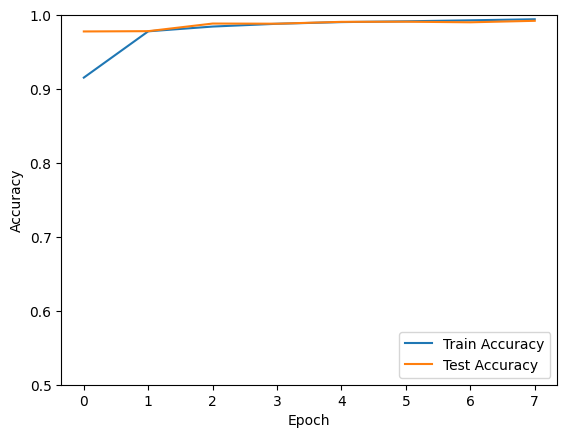

In [22]:
# CNN creation
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # Softmax on top layer

# Display model structure summary
model.summary()

# Train the CNN model
# Using CategoricalCrossentropy (Loss function for One-Hot Encoded labels)
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Correct loss for encoded labels
              metrics=['accuracy'])

# Train the model for 8 epochs, adjust batch_size as needed
# --- IMPORTANT: Use the ENCODED labels for training and validation ---
history = model.fit(train_images, train_labels_encoded, epochs=8, batch_size=180,
                    validation_data=(test_images, test_labels_encoded))

# Plot accuracy (optional, but good practice)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

#5. **Model testing**
We ask the model to guess 5 random digits from the test set and show the picture, the guess, and the right answer




Test Loss: 0.0262, Test Accuracy: 0.9923

--- 5 Individual Predictions ---
Predict: 2
Real: 2


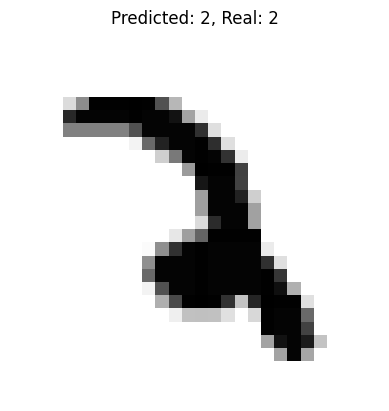

Predict: 2
Real: 2


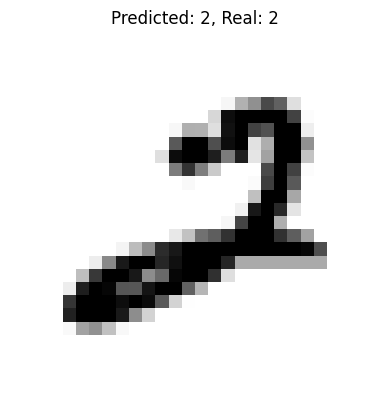

Predict: 4
Real: 4


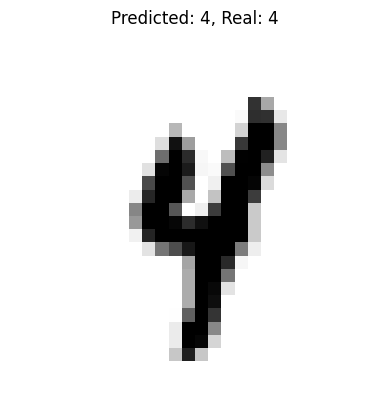

Predict: 7
Real: 7


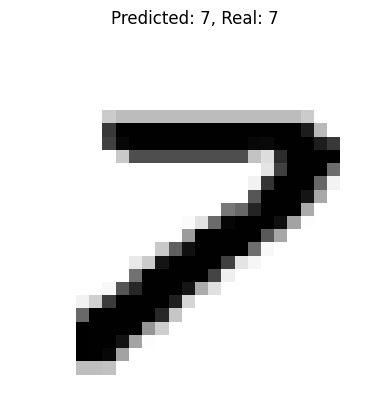

Predict: 0
Real: 0


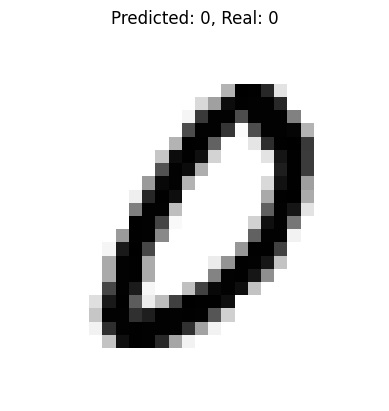

In [23]:
# Evaluate the model's performance using ENCODED test labels
test_loss, test_acc = model.evaluate(test_images, test_labels_encoded, steps=5, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Make 5 Predictions
print("\n--- 5 Individual Predictions ---")

for x in range(5):
    # Random index in dataset
    i = randint(0, len(test_images) - 1)

    # Prepare single image for prediction
    single_image = np.expand_dims(test_images[i], axis=0)

    # Prediction: get the index (digit) with the highest probability
    prediction_result = model.predict(single_image, verbose=0)
    predict = np.argmax(prediction_result)

    # Values and images
    print(f"Predict: {predict}")
    print(f"Real: {test_labels[i]}") # Use original test_labels for display

    plt.imshow(test_images[i].squeeze(), cmap=plt.cm.binary)
    plt.title(f"Predicted: {predict}, Real: {test_labels[i]}")
    plt.axis('off')
    plt.show()

#**6. Results**

In [24]:
# Perform 5 different predictions with the test dataset

# Make predictions (returns an array of probabilities)
predictions = model.predict(test_data)

# Select 5 specific indices from the test set for consistent display
indices = [12, 25, 43, 78, 99]

print("\n--- 5 Individual Predictions ---")
for i in indices:
    # The prediction is the index with the highest probability
    predicted_label = np.argmax(predictions[i])
    # The actual label comes from the original non-encoded test_labels
    actual_label = test_labels[i]

    print(f"Test Sample Index {i}: Predicted = {predicted_label}, Actual = {actual_label}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step

--- 5 Individual Predictions ---
Test Sample Index 12: Predicted = 7, Actual = 9
Test Sample Index 25: Predicted = 7, Actual = 0
Test Sample Index 43: Predicted = 7, Actual = 2
Test Sample Index 78: Predicted = 7, Actual = 9
Test Sample Index 99: Predicted = 7, Actual = 9
